### Problem Set 1

In [4]:
# @author: Anita Mezzetti, Franceso Maizza, Hien Lê

In [5]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Problem:
You have recently started your job as a Data Scientist in a famous telecom company. As you
may very well know, telecoms fiercely fight for customer retention, with entire service branches
devoted to this task. This is due to the fact that retention is more cost efficient than capturing
new clients. One of your colleagues from the master got hired in the Marketing Department, and
he needs to understand the company’s clients, so he’s asked you to help him out with a descriptive
report and segmentation of the customer base. He’s specially interested in the lifetime value of loyal
customers. Thus, you can ignore (for now) those who leave the company (churn).

Prepare a descriptive report and segment the customers in the most adequate way. For this
assignment, use the data on customers.csv. Clean, organise and present an exploratory analysis
of the data. What can you tell about the customers ?

### 1. Data Loading

In [6]:
df = pd.read_csv (r'customers.csv') 

# we delete clients who leave the company (Churn=Yes)
positive_churn = df.Churn=='Yes' # find customers who leave the company (churn) 
df = df.drop(df[positive_churn].index) # delete them from the DataFrame
#df.reindex(range(len(df)), method='backfill') #reindex the series

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


In [8]:
number_tot = len(positive_churn) # total number of clients 
number_negative_churn = len(df) # number of clients who did NOT leave the company 
perc_negative_tot = number_negative_churn/number_tot
print(f'Percentage of clients who remain with the company (on the total) = {perc_negative_tot}')
print(f'Percentage of clients who leave the company (on the total) = {1-perc_negative_tot}')

Percentage of clients who remain with the company (on the total) = 0.7346301292063041
Percentage of clients who leave the company (on the total) = 0.2653698707936959


In [9]:
# convert total charges in floating datas and correct possible errors
df["TotalCharges"] = pd.to_numeric(df.TotalCharges, errors='coerce').fillna(0, downcast='infer') 
df["SeniorCitizen"] = df.SeniorCitizen.astype('O')

In [10]:
print ("Summary statistics of the floating types variables")
df.describe()

Summary statistics of the floating types variables


,tenure,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000
mean,37.569965,61.265124,2549.911442
std,24.113777,31.092648,2329.954215
min,0.000000,18.250000,0.000000
25%,15.000000,25.100000,572.900000
50%,38.000000,64.425000,1679.525000
75%,61.000000,88.400000,4262.850000
max,72.000000,118.750000,8672.450000


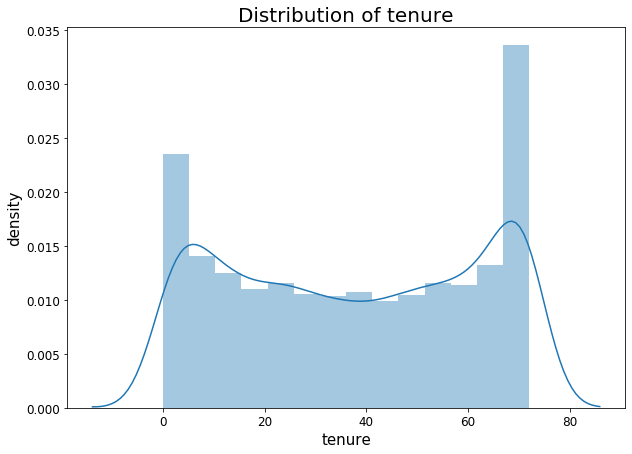

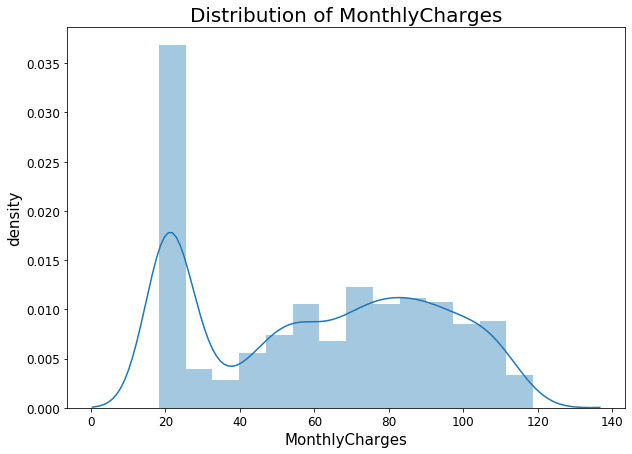

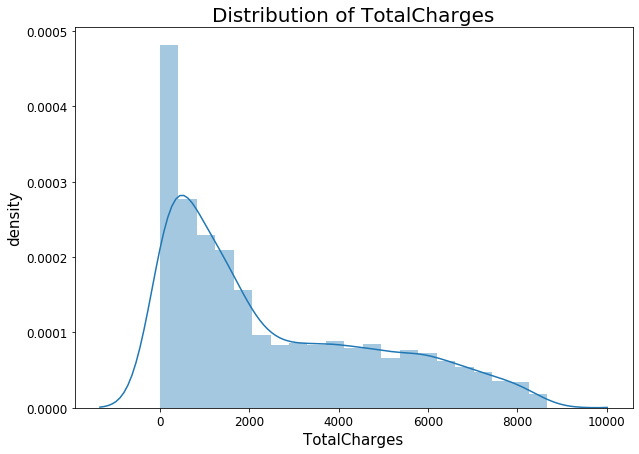

In [11]:
for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    plt.figure(figsize=(10,7))
    sns.distplot(df[col])
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.xlabel(col, fontsize=15)
    plt.ylabel("density", fontsize=15)
    plt.title(f"Distribution of {col}", fontsize=20)

Text(0.5, 0.98, 'Relation between tenure and monthly charges')

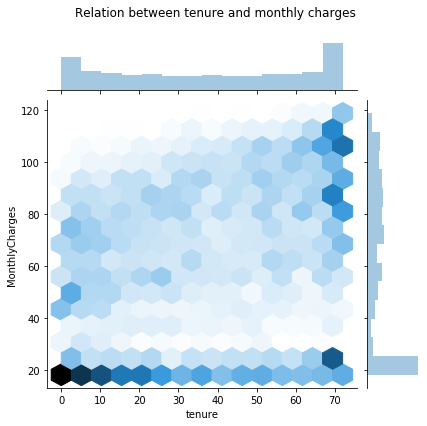

In [28]:
x="tenure"
y="MonthlyCharges"
g = sns.jointplot(x, y, data=df, kind="hex")
plt.subplots_adjust(top=0.9)
g.fig.suptitle( "Relation between tenure and monthly charges")
#sns.jointplot(x, y, data=df, kind="kde")

### 2. Data Analysis

In the following section, an analysis of the main parameters that can characterize the customers is done focusing on their personal characteristics and on the products they are more likely to buy.

In [9]:
# analize only Object variables
df_obj = df.select_dtypes(include=['O']) # include only the objects
df_obj = df_obj.drop(columns="customerID") # cancel costumer column

In [10]:
df_obj = df.select_dtypes(include=['O'])
df_obj = df_obj.drop(columns="customerID")
df_summ = pd.DataFrame(index=["proportion"], columns=pd.MultiIndex.from_product([list(df_obj.columns[:-1]), []]))

for col in df_obj.columns[:-1]: # excluding the Churn column
    
    # add to the empty df the count of each column
    col_summ = df_obj[col].value_counts(normalize=True) 
    for sub_col in col_summ.keys():
        df_summ[col, sub_col] = col_summ[sub_col] 

print ("Percentages of the possible values for each single object")
df_summ.sort_index(1).transpose()

Percentages of the possible values for each single object


proportion
Contract         Month-to-month               0.429068
                 Two year                     0.318322
                 One year                     0.252609
Dependents       Yes                          0.344801
                 No                           0.655199
DeviceProtection Yes                          0.362775
                 No                           0.364128
                 No internet service          0.273096
InternetService  No                           0.273096
                 DSL                          0.379204
                 Fiber optic                  0.347700
MultipleLines    Yes                          0.409934
                 No                           0.491109
                 No phone service             0.098956
OnlineBackup     Yes                          0.368380
                 No                           0.358523
                 No internet service          0.273096
OnlineSecurity   Yes                          0.333204
                 No                           0.393699
                 No internet service          0.273096
PaperlessBilling Yes                          0.535562
                 No                           0.464438
Partner          Yes                          0.528218
                 No                           0.471782
PaymentMethod    Mailed check                 0.252029
                 Electronic check             0.250097
                 Credit card (automatic)      0.249324
                 Bank transfer (automatic)    0.248550
PhoneService     Yes                          0.901044
                 No                           0.098956
SeniorCitizen    0                            0.871279
                 1                            0.128721
StreamingMovies  Yes                          0.369927
                 No                           0.356977
                 No internet service          0.273096
StreamingTV      Yes                          0.365868
                 No                           0.361036
                 No internet service          0.273096
TechSupport      Yes                          0.335137
                 No                           0.391767
                 No internet service          0.273096
gender           Male                         0.507344
                 Female                       0.492656

##### We now visualise the numbers above ...

In [11]:
def annotate(ax, offset=0.045): # this function also slims down the bar
    for p in ax.patches:
        diff = p.get_width() - 0.5
        p.set_width(0.5)
        p.set_x(p.get_x() + diff * .5)
        ax.annotate(f"{round(p.get_height(), 2)}", (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', rotation=39, xytext=(0, 20),
                 textcoords='offset points')  
        ax.set_ylim(0,ax.get_ylim()[1] + offset) # to make space for the annotations

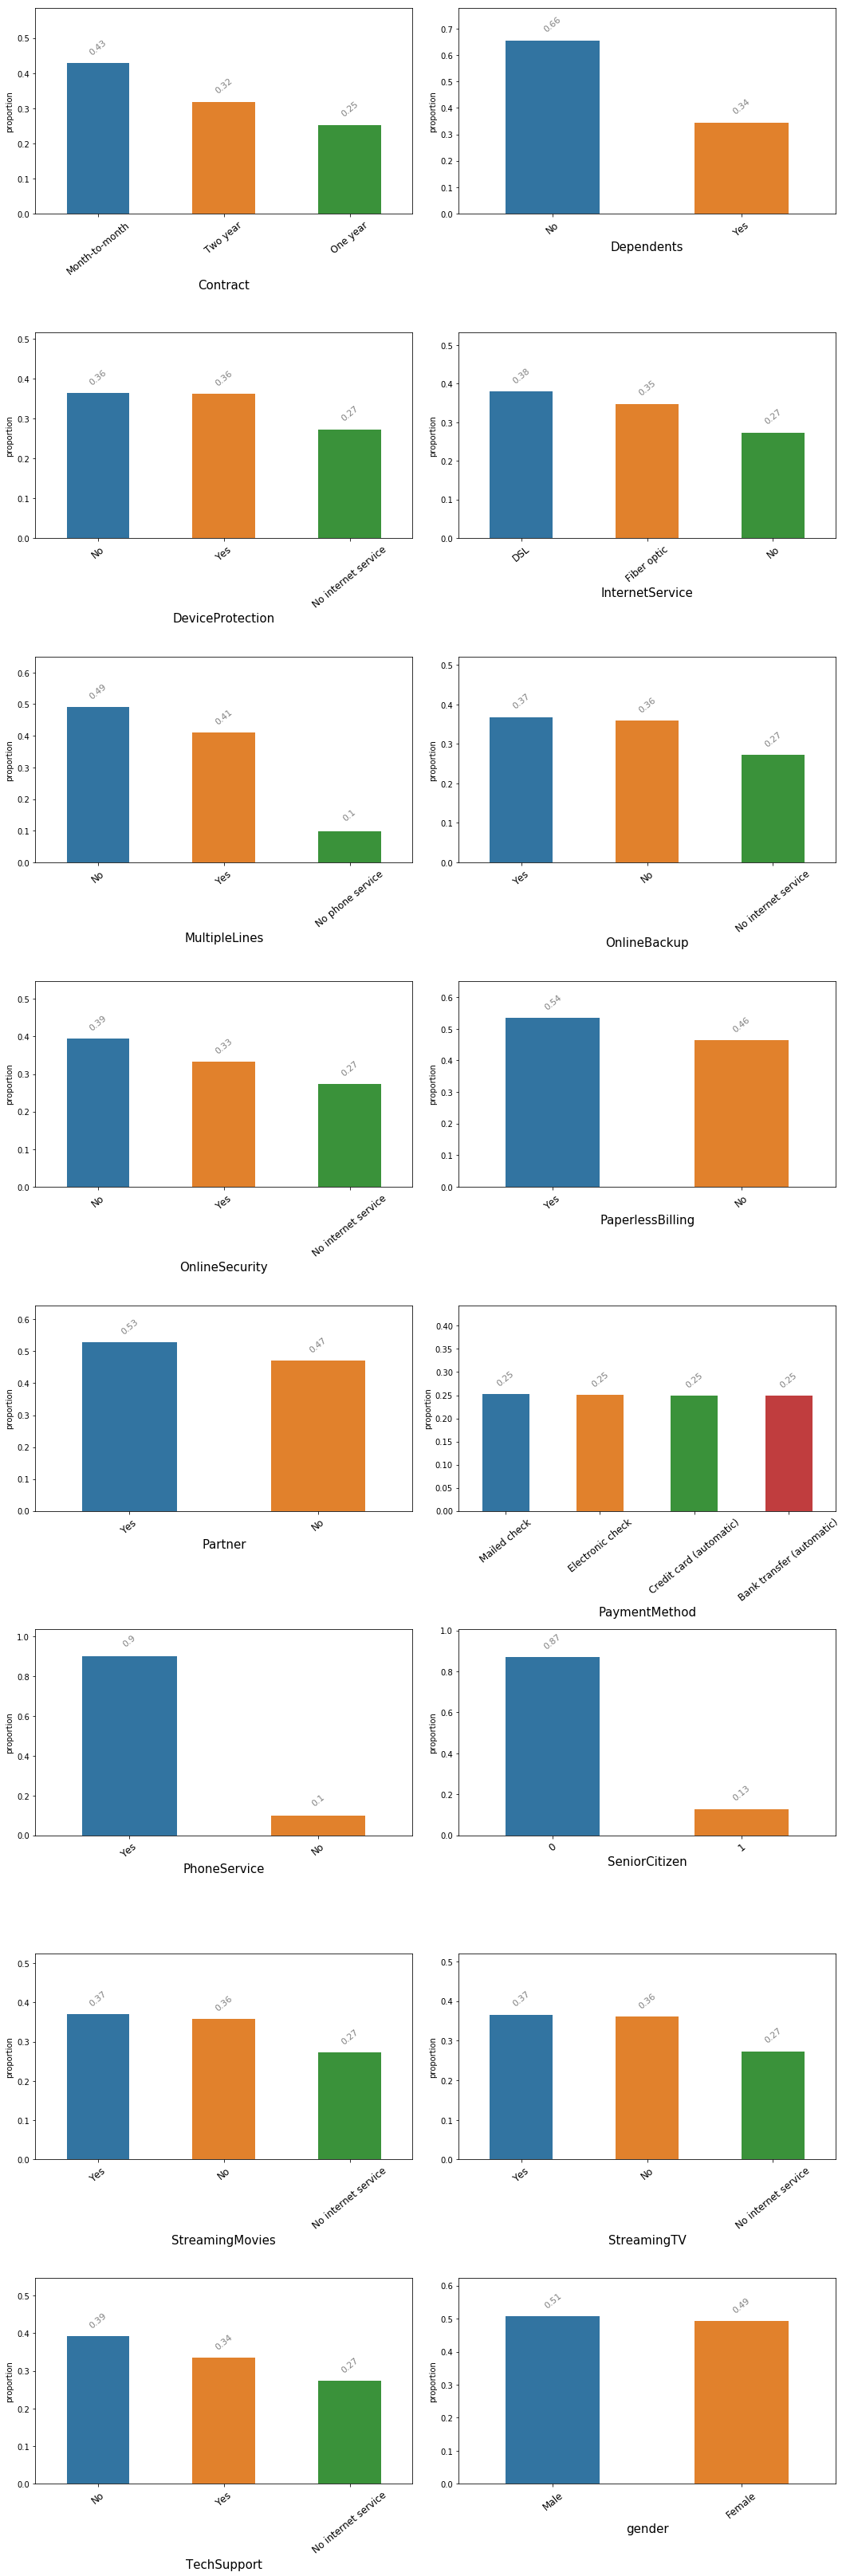

In [12]:
fig, ax = plt.subplots(figsize=(15,45), ncols=2, nrows=8)
axes = ax.flatten()

for i, col in enumerate(df_summ.columns.levels[0]):
    category = df_summ.loc["proportion", col]
    sns.barplot(category.index, category, ax=axes[i])
    axes[i].tick_params(axis="x", rotation=39, labelsize=12)
    axes[i].set_xlabel(col, fontsize=15)
    annotate(axes[i])
    
#plt.title("Group composition of each feature", fontsize=20)
plt.tight_layout()
plt.show()

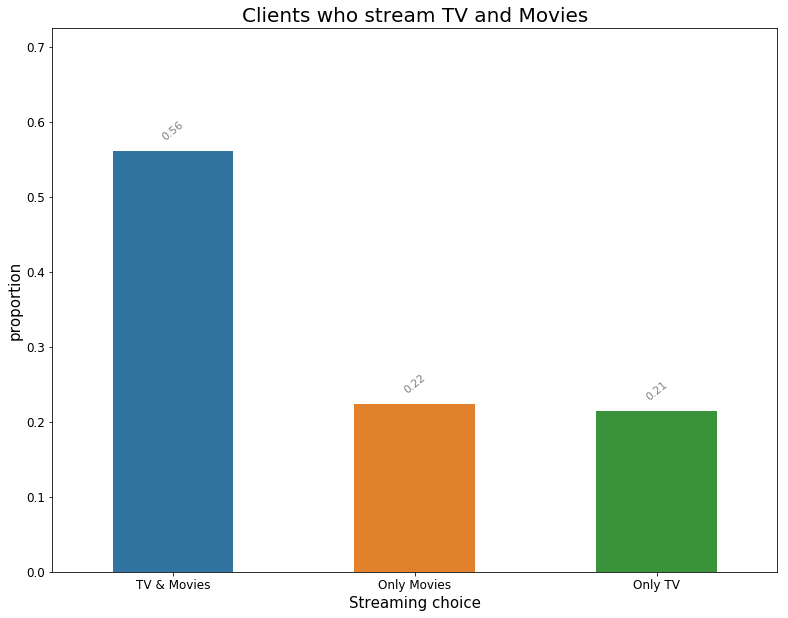

In [13]:
# creation of a series describing which clients have streaming Tv and streaming Movies
streaming_total = len(df[(df.StreamingTV == 'Yes') | (df.StreamingMovies == 'Yes')])
num_stream_both = len(df[(df.StreamingTV == 'Yes') & (df.StreamingMovies == 'Yes')])
num_stream_movies = len(df[(df.StreamingTV == 'No') & (df.StreamingMovies == 'Yes')])
num_stream_tv = len(df[(df.StreamingTV == 'Yes') & (df.StreamingMovies == 'No')])

streaming_stats = pd.Series({"TV & Movies": num_stream_both, "Only Movies": num_stream_movies, "Only TV": num_stream_tv})

fig, ax = plt.subplots(figsize=(13,10))
sns.barplot(streaming_stats.index, streaming_stats / streaming_total, ax=ax)
ax.tick_params(labelsize=12)
ax.set_ylabel("proportion", fontsize=15)
ax.set_xlabel("Streaming choice", fontsize=15)
annotate(ax)
plt.title("Clients who stream TV and Movies", fontsize=20)
plt.show()

The previous graph shows the preferences of the customers regarding the streaming service offered by the company.

In particular, it can be observed that xx% of the customers of the company pay for a streaming service. Among the streaming service customer, it can be observed that more than half decides to access both the Tv and Movies services. The remaining customers are equally likely to subscribe either for the Movies or for the TV service.

In [14]:
#between how many clients who do not have a phone line, look for ones who have internet
yesInternet_noPhone = 0 #counter
noPhone = 0
for i in df.index:
    if (df.PhoneService[i]=='No'): #if not phone service
        noPhone += 1
        #count how many have internet
        if(df.InternetService[i]!='No'):
            yesInternet_noPhone += 1

perc = yesInternet_noPhone / noPhone *100 #percentage of clients who have internet and not phone

# decide if it is the case to keep this, in case change the text
print('The percentage of clients who have internet and do not have phone service is %.2f ' % perc) 

The percentage of clients who have internet and do not have phone service is 100.00 


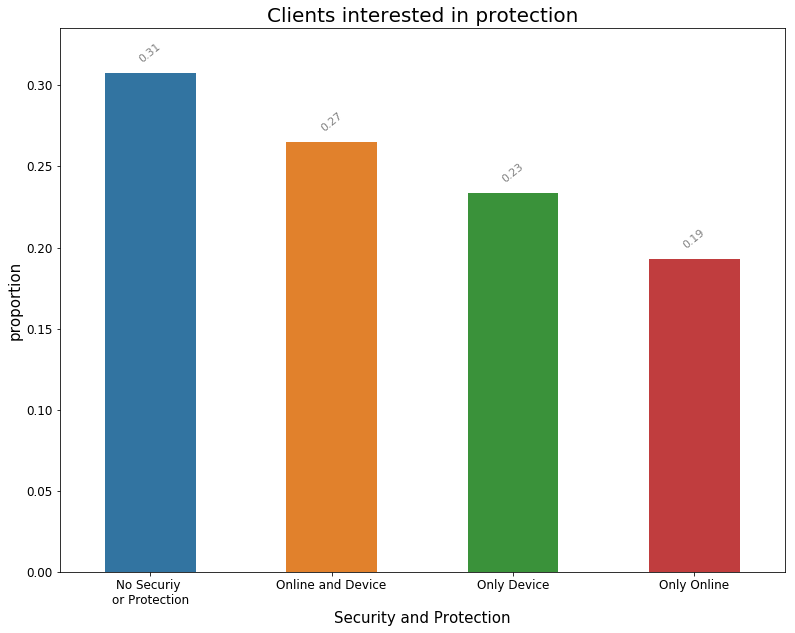

In [15]:
# clients interesed in protection: how many have have online security and/or device protection

protection_customers = [] # where to save the information for each costumer
for i in df.index:
    if (df.OnlineSecurity[i] == 'Yes') and (df.DeviceProtection[i] == 'Yes'): #both
        protection_customers += ['Online and Device']
    elif (df.OnlineSecurity[i] == 'Yes') and (df.DeviceProtection[i] == 'No'): #only Security
        protection_customers += ['Only Online']
    elif (df.OnlineSecurity[i] == 'No') and (df.DeviceProtection[i] == 'Yes'): #only Device
        protection_customers += ['Only Device']
    elif (df.OnlineSecurity[i] == 'No') and (df.DeviceProtection[i] == 'No'): #no
        protection_customers += ['No Securiy \nor Protection']
        
protection_stats = pd.Series(protection_customers) 
protection_prob = protection_stats.value_counts(normalize=True)  # count and work in percentage

fig, ax = plt.subplots(figsize=(13,10))
sns.barplot(protection_prob.index, protection_prob, ax=ax)
annotate(ax, 0.003)
ax.tick_params(labelsize=12)
ax.set_xlabel('Security and Protection', fontsize=15)
ax.set_ylabel('proportion', fontsize=15)

plt.title("Clients interested in protection", fontsize=20)
plt.show()

The previous graph shows the preferences of the customers regarding the security and protection services offered by the company.

In particular, it can be observed that xx% of the customers decides not to protect themselves neither with and online nor with an offline security service. Among the other xx%, it can be observed that xx% decides to have both an online and a device protection. The rest of the customers are more likely to protect their devices than the online services.

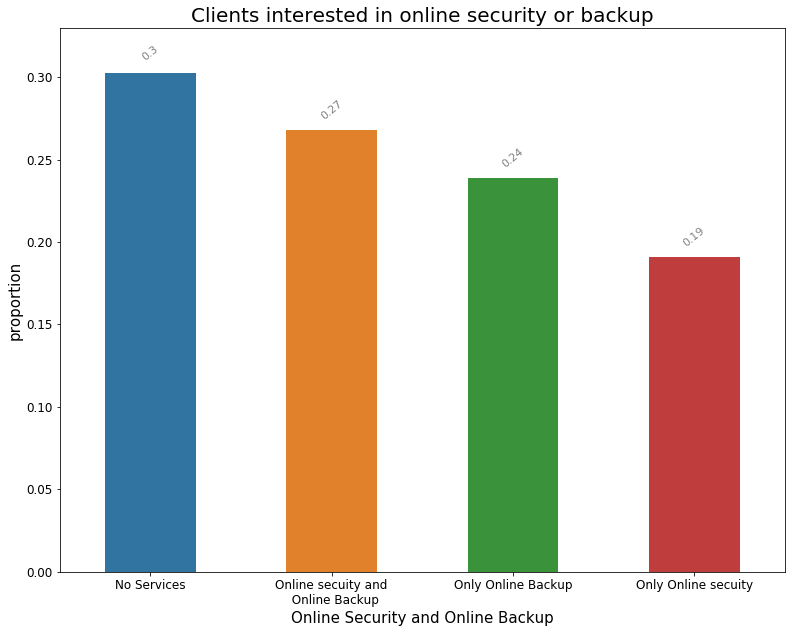

In [16]:
# clients interesed in online services: online security and/or online backup

onl_serv_customers =[] #where to save the information for each costumer
for i in df.index:
    if (df.OnlineSecurity[i] == 'Yes') and (df.OnlineBackup[i] == 'Yes'): #both
        onl_serv_customers += ['Online secuity and\n  Online Backup']
    elif (df.OnlineSecurity[i] == 'Yes') and (df.OnlineBackup[i] == 'No'): #only Movies
        onl_serv_customers += ['Only Online secuity']
    elif (df.OnlineSecurity[i] == 'No') and (df.OnlineBackup[i] == 'Yes'): #only tv
        onl_serv_customers += ['Only Online Backup']
    elif (df.OnlineSecurity[i] == 'No') and (df.OnlineBackup[i] == 'No'): #no
        onl_serv_customers += ['No Services']

onl_serv_stats = pd.Series(onl_serv_customers) 
onl_serv_prob = onl_serv_stats.value_counts(normalize=True)  #count and work in percentage

fig, ax = plt.subplots(figsize=(13,10))
sns.barplot(onl_serv_prob.index, onl_serv_prob, ax=ax)
annotate(ax, 0.003)
ax.tick_params(labelsize=12)
ax.set_xlabel('Online Security and Online Backup', fontsize=15)
ax.set_ylabel('proportion', fontsize=15)

plt.title("Clients interested in online security or backup", fontsize=20)
plt.show()

The previous graphs describes the preferences of the customers regarding the online services offered by the company.

In particular, it can be observed that xx% of the customers decides not to buy any online service. Among the other xx%, it can be observed that xx% decides to have both an online security and an online backup service. The rest of the customers are more likely to pay for the online backup rather than the online security offer.

### 3. Complementary

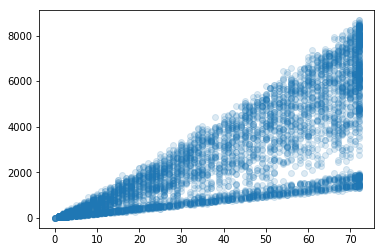

In [24]:
plt.scatter(df["tenure"], df["TotalCharges"], alpha=0.15)

/home/hienle/.virtualenvs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


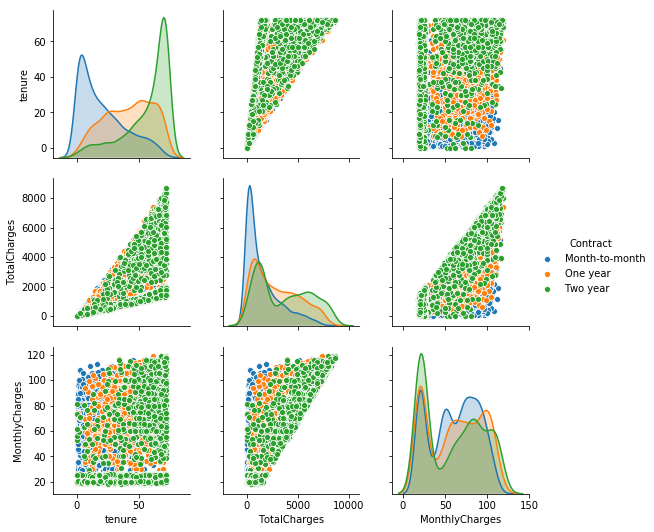

In [40]:
sns.pairplot(df[~positive_churn], vars=["tenure", "TotalCharges", "MonthlyCharges"], hue="Contract")

In [54]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

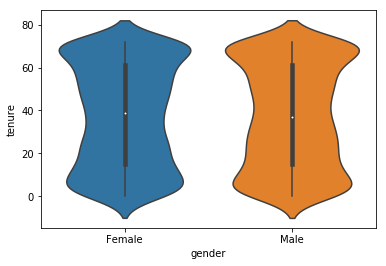

In [48]:
sns.violinplot(data=df, x="gender", y="tenure") 
# => almost identical in distribution when it comes to tenure btw two genders

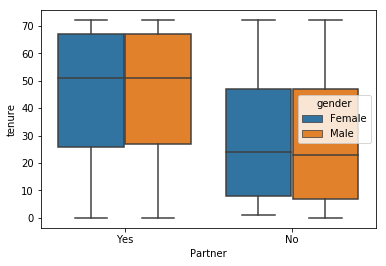

In [46]:
sns.boxplot(data=df, x="Partner", y="tenure", hue="gender")